In [1]:
# Prescribed conditions for MITgcm
import xarray as xr
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import os, sys

In [2]:
# Initial Conditions (T,S)
from scipy import interpolate

# Vertical cell spacing (for T and S profiles)
dz1, dz2, dz3 = 2, 4, 6
segment1 = -np.arange(0.5 * dz1, 20 * dz1, dz1)
segment2 = -40 - np.arange(0.5 * dz2, 30 * dz2, dz2)
segment3 = -160 - np.arange(0.5 * dz3, 40 * dz3, dz3)
zprof = np.concatenate((segment1, segment2, segment3))

# 2013 Summer profiles at JMF proximal basin
z = np.array([0, -15, -25, -100, -200, -300, -400])
t0 = [4.5, 6.5, 7, 8.2, 8.4, 8.5, 8.5]
s0 = [20, 27.5, 28.5, 30.5, 31.4, 31.6, 31.6]

func_t = interpolate.interp1d(z, t0, kind='cubic')
func_s = interpolate.interp1d(z, s0, kind='cubic')

t_ini, s_ini = func_t(zprof), func_s(zprof)

In [ ]:
#zprof

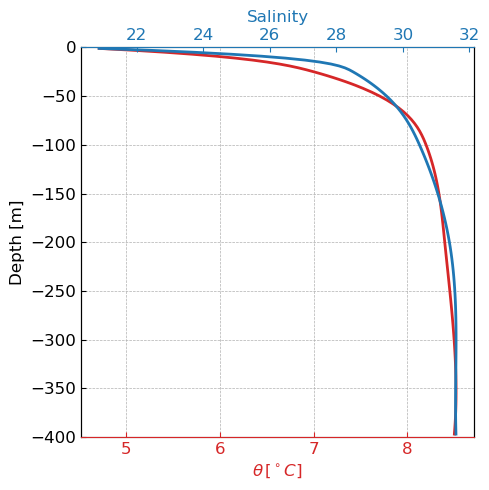

In [3]:
# Plot initial TS
fig0 = plt.figure(figsize=(5,5), tight_layout=True)

ax1 = fig0.add_subplot(111)
plt.grid(linestyle = '--', linewidth = 0.5)
ax1.plot(t_ini,zprof,c='C3',lw=2)
ax1.set_ylim([-400, 0])
#ax1.set_yticks([8.5,9,9.5,10])
ax1.set_xlabel(r'$\theta\,[^\circ C]$', size=12,color='C3')
ax1.set_ylabel(r'Depth [m]',fontsize=12)
ax1.tick_params(direction='in', labelsize=12)
ax1.tick_params(axis='x', colors='C3')

ax2=ax1.twiny()
ax2.plot(s_ini,zprof,c='C0',lw=2)
#ax2.set_xlim([20, 35])
ax2.set_xlabel(r'Salinity', size=12,color='C0')
ax2.tick_params(direction='in', labelsize=12)
ax2.tick_params(axis='x', colors='C0')

ax2.spines['top'].set_color('C0')
ax2.spines['bottom'].set_color('C3')

In [ ]:
# Test

In [4]:
# Single wind event

externForcingCircle = 30*86400 # Forcing period in second
externForcingPeriod = 0.25*86400 # time interval between forcing field records
nt = int(externForcingCircle / externForcingPeriod)
model_time = np.linspace(0,externForcingCircle,nt+1);
up = 0*86400 / externForcingPeriod
down = 2.5*86400 / externForcingPeriod
ramp = 0.5*86400 / externForcingPeriod
taum = [-.2, -.1, 0, .1, .2] # maximum wind stress

zonal_wind_stress = np.zeros((len(taum),nt))

nf = int(down+ramp)
forcing = np.zeros((len(taum),nf))
# for i in range(0,len(taum)):
#     tau = taum[i]
#     for j in range(nt):
#         if (j <= up - 1) or (j >= down + ramp - 1):
#             zonal_wind_stress[i, j] = 0
#         elif j < up + ramp - 1:
#             zonal_wind_stress[i, j] = tau * (j - (up - 1)) / ramp
#         elif down - 1 < j < down + ramp - 1:
#             zonal_wind_stress[i, j] = tau * (down + ramp - 1 - j) / ramp
#         else:
#             zonal_wind_stress[i, j] = tau
for i in range(0,len(taum)):
    tau = taum[i]
    for j in range(nf):
        if j <= up - 1:
            forcing[i, j] = 0
        elif j < up + ramp - 1:
            forcing[i, j] = tau * (j - (up - 1)) / ramp
        elif j > down-1:
            forcing[i, j] = tau * (down + ramp - 1 - j) / ramp
        else:
            forcing[i, j] = tau

zonal_wind_stress[:,:nf] = forcing

#wind = np.concatenate((np.zeros((len(taum),1)), zonal_wind_stress), axis=1)

In [ ]:
forcing.shape

In [5]:
# Repeated wind event
rt = 1 # number of wind events

zonal_wind_stress[:,:nf*rt] = np.tile(forcing, rt)

wind = np.concatenate((np.zeros((len(taum),1)), zonal_wind_stress), axis=1)

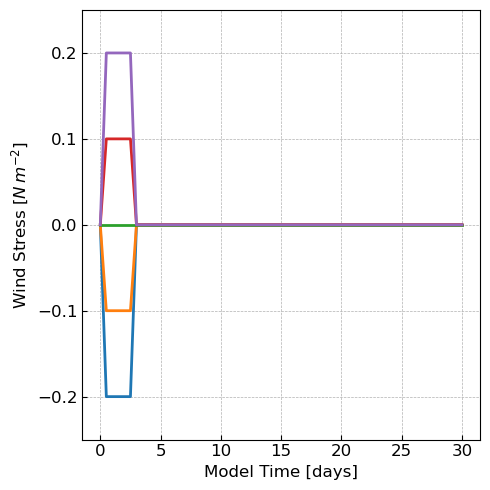

In [6]:
# Plot zonal wind stress
fig1 = plt.figure(figsize=(5,5), tight_layout=True)

ax1 = fig1.add_subplot(111)
plt.grid(linestyle = '--', linewidth = 0.5)

for i in range(len(taum)):
    ax1.plot(model_time/86400,wind[i,:],lw=2,label=str(taum[i]))
#
#ax1.legend(title=r'',loc='best',fontsize=12)
#ax1.set_xlim([0, 5])
ax1.set_ylim([-.25, .25])
#ax1.set_yticks([8.5,9,9.5,10])
ax1.set_xlabel(r'Model Time [days]', size=12)
ax1.set_ylabel(r'Wind Stress [$N\,m^{-2}$]',fontsize=12)
ax1.tick_params(direction='in', labelsize=12)


In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/JorgeMontt"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/wind_single.png', dpi=300, bbox_inches='tight')